In [153]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [154]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [155]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [156]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
#from matplotlib.patches import Rectangle
#from mpl_toolkits.basemap import Basemap
#from scipy.io import loadmat
import pickle
from cmocean import cm
import warnings
import netCDF4 as nc

#by-layer mean extractor - in this folder
import extract_bylayer_mean as ebm
import importlib
importlib.reload(ebm)
from salishsea_tools import viz_tools

%matplotlib inline
warnings.simplefilter('ignore')



#### DEFINE MASK FOR INLETS (TOBA, BUTE, JERVIS)

1.1363636363636362

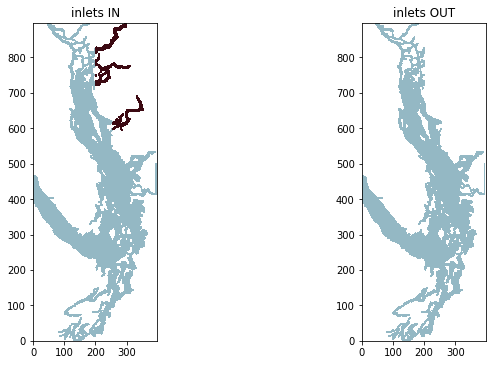

In [157]:
w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
fact = 0.9
fig = plt.figure(figsize=(12*fact,6.5*fact))

ax0 = fig.add_subplot(1,2,1)
#toba and bute

im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
ax0.set_title('inlets IN')
viz_tools.set_aspect(ax0)

ax2 = fig.add_subplot(1,2,2)
#toba and bute mask
pco2[700:898,200:398] = np.nan
pco2[550:700,255:398] = np.nan
im = ax2.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
ax2.set_title('inlets OUT')
viz_tools.set_aspect(ax2)

#### MEANS EXTRACTING CODE  - uses extract_bylayer_mean.py, which is in this folder
    
    Done on:
    BR1_DIC_means_inletsIN.pkl
    BR2_DIC_means_inletsIN.pkl
    BR3_ciliates_means_inletsIN.pkl
    BR3_ciliates_means_inletsOUT.pkl
    BR3_diatoms_means_inletsIN.pkl
    BR3_diatoms_means_inletsOUT.pkl
    BR3_DIC_means_inletsIN.pkl
    BR3_DIC_means_inletsOUT.pkl
    BR3_flagellates_means_inletsIN.pkl
    BR3_flagellates_means_inletsOUT.pkl
    PI3rr_DIC_means_inletsIN.pkl
    PI3rr_DIC_means_inletsOUT.pkl
           
    examples of use:
    # start = '2015-01-01' #start of timeperiod
    # end = '2015-12-31' #end of timeperiod (typically a year)
    # ftype = 'carp' #type of model result .nc 
    # sdir = '/NOT_MAIN_ANALYSIS/BR_1st_2015' #where under directory tree do we find ncs 
    # inletmask = False #are we masking out Toba/Bute/Jervis?
    # varname = 'dissolved_inorganic_carbon' #name of variable
    # fname = 'BR1_DIC_means_inletsIN' #name of resulting pkl 
    # ebm.extractor(start, end, ftype, sdir, varname, fname,  inletmask)
    

In [158]:
# importlib.reload(ebm)

# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# ftype = 'carp' #type of model result .nc 
# sdir = '/MAIN/BR_3rd_2015' #where under directory tree do we find ncs 
# inletmask = False #are we masking out Toba/Bute/Jervis?
# varname = 'dissolved_inorganic_carbon' #name of variable
# fname = 'BR3_DIC_means_inletsIN' #name of resulting pkl 
# ebm.extractor(start, end, ftype, sdir, varname, fname,  inletmask)

# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# ftype = 'carp' #type of model result .nc 
# sdir = '/MAIN/BR_3rd_2015' #where under directory tree do we find ncs 
# inletmask = True #are we masking out Toba/Bute/Jervis?
# varname = 'dissolved_inorganic_carbon' #name of variable
# fname = 'BR3_DIC_means_inletsOUT' #name of resulting pkl 
# ebm.extractor(start, end, ftype, sdir, varname, fname,  inletmask)

In [159]:
# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# ftype = 'carp' #type of model result .nc 
# sdir = '/PILA3_rerun/PI3' #where under directory tree do we find ncs 
# inletmask = False #are we masking out Toba/Bute/Jervis?
# varname = 'dissolved_inorganic_carbon' #name of variable
# fname = 'PI3rr_DIC_means_inletsIN' #name of resulting pkl 
# ebm.extractor(start, end, ftype, sdir, varname, fname,  inletmask)

# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# ftype = 'carp' #type of model result .nc 
# sdir = '/PILA3_rerun/PI3' #where under directory tree do we find ncs 
# inletmask = True #are we masking out Toba/Bute/Jervis?
# varname = 'dissolved_inorganic_carbon' #name of variable
# fname = 'PI3rr_DIC_means_inletsOUT' #name of resulting pkl 
# ebm.extractor(start, end, ftype, sdir, varname, fname,  inletmask)

#### LOAD PKLS OF ABOVE EXTRACTED QUANTITIES

In [160]:
#extract means for BR1-BR3, get fraser discharge
#var
BR1_var = pickle.load(open('./pkls/BR1_DIC_means_inletsIN.pkl' , 'rb')) 
BR2_var = pickle.load(open('./pkls/BR2_DIC_means_inletsIN.pkl' , 'rb')) 
BR3_var = pickle.load(open('./pkls/BR3_DIC_means_inletsIN.pkl' , 'rb')) 
#inlets out
BR3_var_IO = pickle.load(open('./pkls/BR3_DIC_means_inletsOUT.pkl' , 'rb')) 

PI3rr_var = pickle.load(open('./pkls/PI3rr_DIC_means_inletsIN.pkl' , 'rb'))
Fraser_discharge = pickle.load(open('./pkls/Fraser_2015_year_runoff_m3_s.pkl', 'rb'))  

mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
depth = mesh['gdept_1d'][:]

#make a long 3-year dataset to be able to compare spinup progress for BR run
BR_var = np.zeros([40,365*3])
BR_var[:,0:365] = BR1_var
BR_var[:,365:2*365] = BR2_var
BR_var[:,2*365:3*365] = BR3_var

#### PLOTS TRACKING BR3 COMPARED WITH BR2, BR1

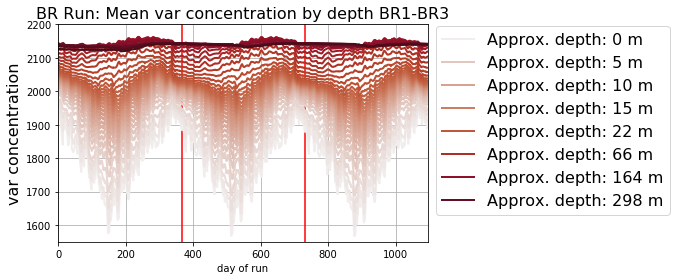

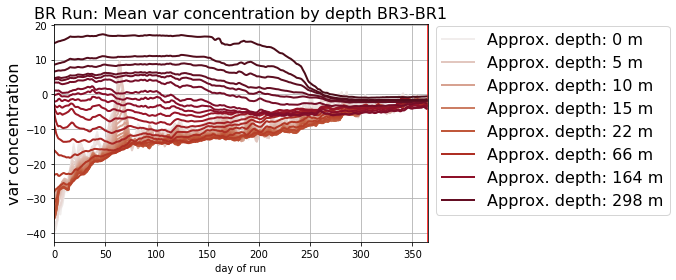

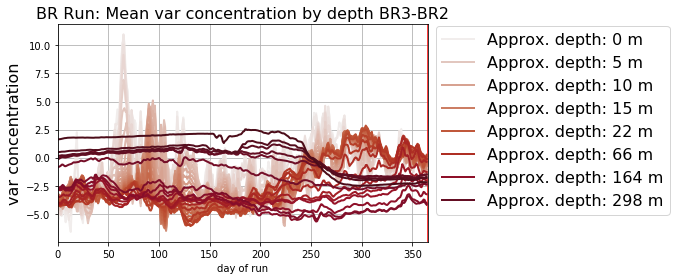

In [161]:
tcm = cm.amp
lw =2
fs = 16
depth = mesh['e3t_0'][0,:,250,250]
fact = 0.5
fig = plt.figure(figsize=(19*fact,8*fact))

days_in = np.arange(0,365*3,1)

#BR
ax = fig.add_subplot(1,1,1)
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax.plot(days_in,BR_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR_var[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*3])
plt.ylim([1550,2200])

ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('BR Run: Mean var concentration by depth BR1-BR3', fontsize = fs )
ax.grid()
ax.set_xlabel('day of run')
plt.tight_layout()


lw =2
fs = 16
depth = mesh['e3t_0'][0,:,250,250]
fact = 0.5
fig = plt.figure(figsize=(19*fact,8*fact))

days_in = np.arange(0,365*1,1)

#BR
ax = fig.add_subplot(1,1,1)
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax.plot(days_in,BR3_var[i,:]-BR1_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR3_var[i,:]-BR1_var[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*1])
#plt.ylim([1550,2200])

ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('BR Run: Mean var concentration by depth BR3-BR1', fontsize = fs )
ax.grid()
ax.set_xlabel('day of run')
plt.tight_layout()


lw =2
fs = 16
depth = mesh['e3t_0'][0,:,250,250]
fact = 0.5
fig = plt.figure(figsize=(19*fact,8*fact))

days_in = np.arange(0,365*1,1)

#BR
ax = fig.add_subplot(1,1,1)
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax.plot(days_in,BR3_var[i,:]-BR2_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR3_var[i,:]-BR2_var[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*1])
#plt.ylim([1550,2200])

ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('BR Run: Mean var concentration by depth BR3-BR2', fontsize = fs )
ax.grid()
ax.set_xlabel('day of run')
plt.tight_layout()


#### CALCULATE DEPTH-INTEGRATED BIOLOGY

In [162]:
flag ='./pkls/BR3_flagellates_means_inletsIN.pkl'
diat ='./pkls/BR3_diatoms_means_inletsIN.pkl'
cili ='./pkls/BR3_ciliates_means_inletsIN.pkl'
csd = '/KEY_MASBAL_LAT_TRANSPORT/pickles/cellsize_alg2.pkl'

flag_mas = pickle.load(open(flag, 'rb'))  
diat_mas = pickle.load(open(diat, 'rb'))
cili_mas = pickle.load(open(cili, 'rb'))

mmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (mmask['e3t_1d'][:])

mask_broad = np.zeros([40,365])

for i in range(0,365):
    mask_broad[:,i] = depths


flag_mas_mm_m2 = np.nansum((mask_broad*flag_mas),axis = 0)
diat_mas_mm_m2 = np.nansum((mask_broad*diat_mas),axis = 0)
cili_mas_mm_m2 = np.nansum((mask_broad*cili_mas),axis = 0)

# nice plot

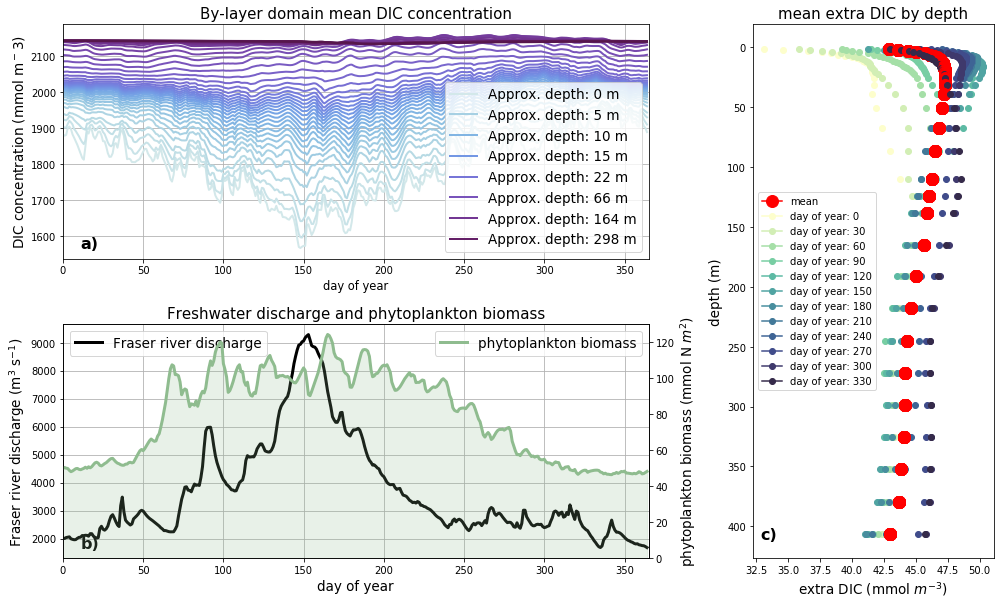

In [163]:
ts = 15 # title font
fs = 13.5 # all other font sizes
fact = 1
fig = plt.figure(figsize=(14*fact, 8.5*fact))
seg = 45
shift = 2

ax1 = plt.subplot2grid((2,3), (0,0), colspan=2, rowspan=1)
tcm = cm.dense
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    if i%5 == 0:
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(loc = 'best', fontsize = fs)
plt.xlim([0,365*1])
plt.grid()
ax1.set_xlabel('day of year', fontsize = fs-2)
ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration', fontsize = ts)


ax2 = plt.subplot2grid((2,3), (1,0), colspan=2, rowspan=1)
ax2b =ax2.twinx()
ax2.plot(days_in,Fraser_discharge,'-k', linewidth = 3, label = 'Fraser river discharge')
ax2.grid()
#ax2b.plot(days_in,flag_mas_mm_m2,color = 'greenyellow',label ='flagellates')
#ax2b.plot(days_in,diat_mas_mm_m2,color = 'mediumspringgreen',label ='diatoms')
#ax2b.plot(days_in,cili_mas_mm_m2,color = 'forestgreen',label ='ciliates')
ax2b.plot(days_in, flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2,\
          color = 'darkseagreen', label = 'phytoplankton biomass', linewidth = 3)
ax2b.fill_between(days_in, np.zeros_like(flag_mas_mm_m2), (flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2), \
                 color = 'darkseagreen', alpha = 0.2 )

ax2b.legend(loc = 'best', fontsize = fs)
ax2.legend(loc = 'upper left', fontsize = fs)
ax2b.set_ylabel('phytoplankton biomass (mmol N $m^2$)', fontsize = fs)
ax2.set_xlabel('day of year', fontsize = fs)
ax2.set_ylabel('Fraser river discharge (m$^3$ s$^{-1}$)', fontsize = fs)
ax2.set_title('Freshwater discharge and phytoplankton biomass', fontsize = ts)
plt.xlim([0,365])
ax2b.set_ylim([0,130])
ax2.text(0.03, 0.03, 'b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='bottom')


ax3 = plt.subplot2grid((2,3), (0,2), colspan=1, rowspan=2)
ax3.text(0.03, 0.03, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')
tcm = cm.deep
mesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')



for d in range(0,12):
    for i in range(0,40):
        zdepth = np.sum(depth[0:i+1]) 
        if ((i == 0) & (d ==0)):        
            ax3.plot((np.nanmean(BR3_var,axis =1)[i]-\
                      np.nanmean(PI3rr_var,axis=1)[i]),zdepth,\
                     marker = 'o', color = 'r', markersize = 12, label = 'mean')
        else:
            ax3.plot((np.nanmean(BR3_var,axis =1)[i]-\
                      np.nanmean(PI3rr_var,axis=1)[i]),zdepth,\
                     marker = 'o', color = 'r', markersize = 12)
        if i == 0:
            ax3.plot((BR3_var[i,d*30]-PI3rr_var[i,d*30]),zdepth,\
                    color = tcm(1.*d/12), marker = 'o', label = 'day of year: '+ str(d*30))
        else:
            ax3.plot((BR3_var[i,d*30]-PI3rr_var[i,d*30]),zdepth,\
                    color = tcm(1.*d/12), marker = 'o')

ax3.set_title('mean extra DIC by depth', fontsize = ts)
ax3.invert_yaxis()
ax3.legend(loc = 'best')
ax3.set_xlabel('extra DIC (mmol $m^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)
fig.tight_layout()





#### LOOKING MORE CLOSELY AT LOWER LEVELS OF MODEL, WE SEE AN INVERSION OF THE CYCLE

#### ONE THEORY - THIS HAS TO DO WITH THE DYNAMICS OF THE DEEP INLETS - IS IT PRESENT IF WE TAKE THEM OUT?

Text(0.5, 1.0, 'By-layer domain mean DIC concentration - INLETS OUT - INLETS IN')

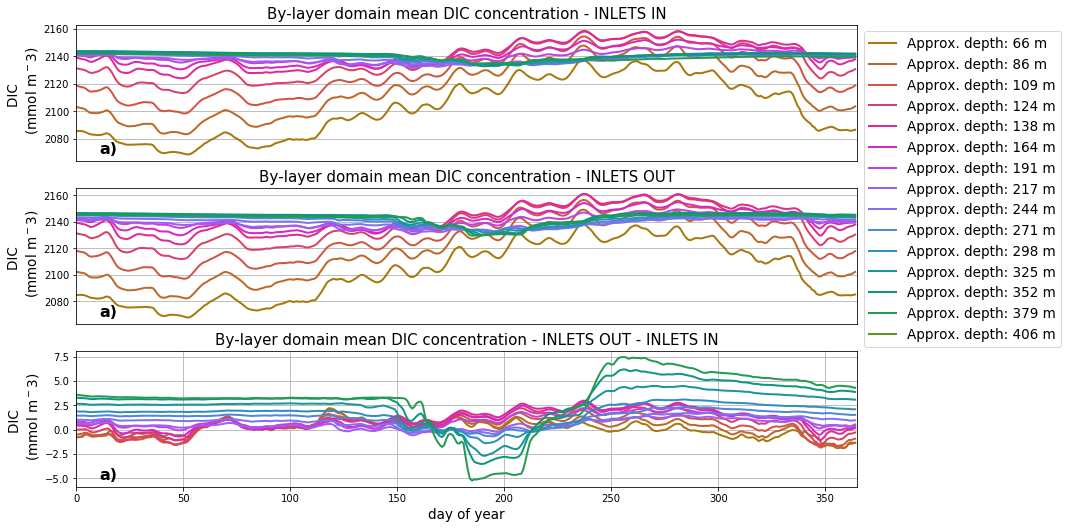

In [165]:
fig = plt.figure(figsize=(14*fact, 8.5*fact))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
tcm = cm.phase
for i in range(25,40):
    zdepth = np.sum(depth[0:i])
    if i%1 !=0: 
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i-25)/16), linewidth = lw)
    if i%1 == 0:
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i-25)/16),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(bbox_to_anchor=[1.0,1.0], fontsize = fs)
plt.xlim([0,365*1])
plt.grid()
ax1.set_xticks([])
#ax1.set_xlabel('day of year', fontsize = fs)
ax1.set_ylabel('DIC \n (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration - INLETS IN', fontsize = ts)

ax2 = plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=1)
tcm = cm.phase
for i in range(25,40):
    zdepth = np.sum(depth[0:i])
    if i%1 !=0: 
        ax2.plot(days_in,BR3_var_IO[i,:],color = tcm(1.*(i-25)/16), linewidth = lw)
    if i%1 == 0:
        ax2.plot(days_in,BR3_var_IO[i,:],color = tcm(1.*(i-25)/16),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax2.text(0.03, 0.03, 'a)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='bottom')
#ax2.legend(bbox_to_anchor=[1.0,1.0], fontsize = fs)
plt.xlim([0,365*1])
plt.grid()
#ax2.set_xlabel('day of year', fontsize = fs)
ax2.set_ylabel('DIC \n (mmol m$^-3$)', fontsize = fs)
ax2.set_title('By-layer domain mean DIC concentration - INLETS OUT', fontsize = ts)
ax2.set_xticks([])

ax3 = plt.subplot2grid((3,3), (2,0), colspan=3, rowspan=1)
tcm = cm.phase
for i in range(25,40):
    zdepth = np.sum(depth[0:i])
    if i%1 !=0: 
        ax3.plot(days_in,BR3_var_IO[i,:]-BR3_var[i,:],color = tcm(1.*(i-25)/16), linewidth = lw)
    if i%1 == 0:
        ax3.plot(days_in,BR3_var_IO[i,:]-BR3_var[i,:],color = tcm(1.*(i-25)/16),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax3.text(0.03, 0.03, 'a)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')
#ax3.legend(bbox_to_anchor=[1.0,1.0], fontsize = fs)
plt.xlim([0,365*1])
plt.grid()
ax3.set_xlabel('day of year', fontsize = fs)
ax3.set_ylabel('DIC \n (mmol m$^-3$)', fontsize = fs)
ax3.set_title('By-layer domain mean DIC concentration - INLETS OUT - INLETS IN', fontsize = ts)

#plt.tight_layout()

### where does the problem start? at level 30 we see a reversal

Text(0.5, 1.0, 'By-layer domain mean DIC concentration - INLETS OUT - INLETS IN')

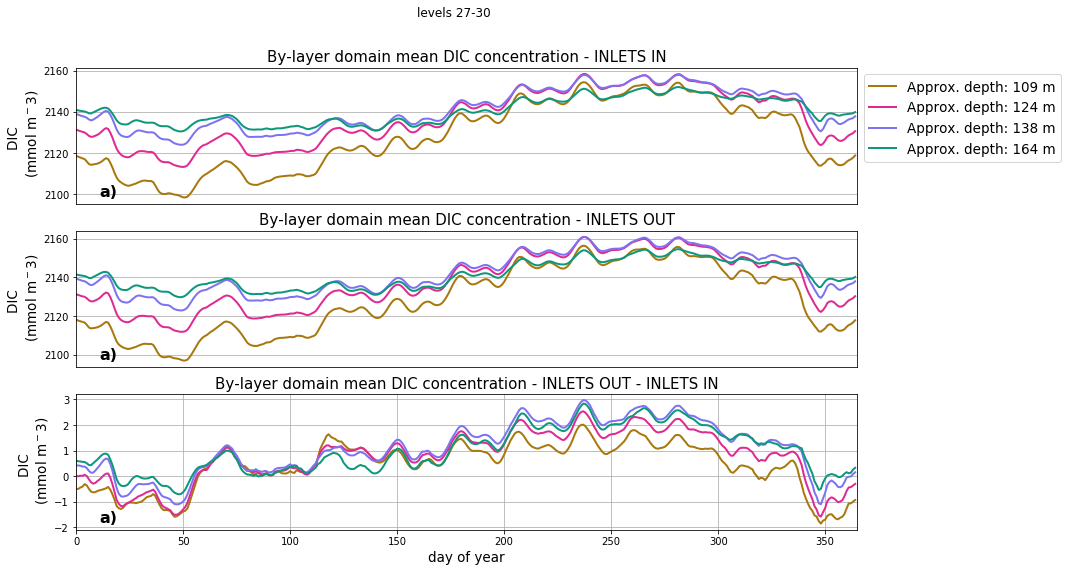

In [166]:
ls = 27
le = 31
fig = plt.figure(figsize=(14*fact, 8.5*fact))
plt.suptitle('levels '+str(ls)+'-'+str(le-1))
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
tcm = cm.phase
for i in range(ls,le):
    zdepth = np.sum(depth[0:i])
    if i%1 !=0: 
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i-ls)/(le-ls)), linewidth = lw)
    if i%1 == 0:
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i-ls)/(le-ls)),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(bbox_to_anchor=[1.0,1.0], fontsize = fs)
plt.xlim([0,365*1])
plt.grid()
ax1.set_xticks([])
#ax1.set_xlabel('day of year', fontsize = fs)
ax1.set_ylabel('DIC \n (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration - INLETS IN', fontsize = ts)

ax2 = plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=1)
tcm = cm.phase
for i in range(ls,le):
    zdepth = np.sum(depth[0:i])
    if i%1 !=0: 
        ax2.plot(days_in,BR3_var_IO[i,:],color = tcm(1.*(i-ls)/(le-ls)), linewidth = lw)
    if i%1 == 0:
        ax2.plot(days_in,BR3_var_IO[i,:],color = tcm(1.*(i-ls)/(le-ls)),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax2.text(0.03, 0.03, 'a)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='bottom')
#ax2.legend(bbox_to_anchor=[1.0,1.0], fontsize = fs)
plt.xlim([0,365*1])
plt.grid()
#ax2.set_xlabel('day of year', fontsize = fs)
ax2.set_ylabel('DIC \n (mmol m$^-3$)', fontsize = fs)
ax2.set_title('By-layer domain mean DIC concentration - INLETS OUT', fontsize = ts)
ax2.set_xticks([])

ax3 = plt.subplot2grid((3,3), (2,0), colspan=3, rowspan=1)
tcm = cm.phase
for i in range(ls,le):
    zdepth = np.sum(depth[0:i])
    if i%1 !=0: 
        ax3.plot(days_in,BR3_var_IO[i,:]-BR3_var[i,:],color = tcm(1.*(i-ls)/(le-ls)), linewidth = lw)
    if i%1 == 0:
        ax3.plot(days_in,BR3_var_IO[i,:]-BR3_var[i,:],color = tcm(1.*(i-ls)/(le-ls)),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax3.text(0.03, 0.03, 'a)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')
#ax3.legend(bbox_to_anchor=[1.0,1.0], fontsize = fs)
plt.xlim([0,365*1])
plt.grid()
ax3.set_xlabel('day of year', fontsize = fs)
ax3.set_ylabel('DIC \n (mmol m$^-3$)', fontsize = fs)
ax3.set_title('By-layer domain mean DIC concentration - INLETS OUT - INLETS IN', fontsize = ts)

#plt.tight_layout()

## WHAT PART OF DOMAIN IS STILL AROUND AT DEPTH LEVEL 30?

1.1363636363636362

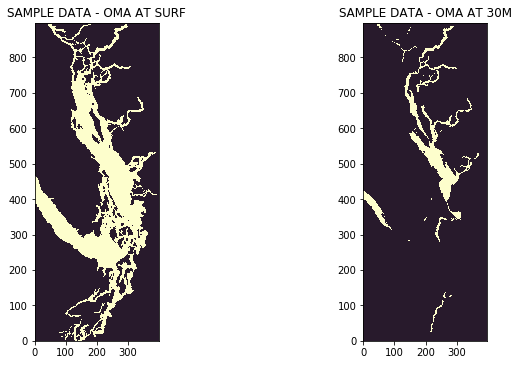

In [167]:
w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
OmA_30 = w['model_output']['OmA'][30,:,:]
OmA_surf = w['model_output']['OmA'][0,:,:]

fact = 0.9
fig = plt.figure(figsize=(12*fact,6.5*fact))

ax0 = fig.add_subplot(1,2,1)
#toba and bute

im = ax0.pcolormesh(OmA_surf, cmap=cm.deep, vmin = 0, vmax = 800)
ax0.set_title('SAMPLE DATA - OMA AT SURF')
viz_tools.set_aspect(ax0)

ax2 = fig.add_subplot(1,2,2)

im = ax2.pcolormesh(OmA_30, cmap=cm.deep, vmin = 0, vmax = 800)
ax2.set_title('SAMPLE DATA - OMA AT 30M')
viz_tools.set_aspect(ax2)

#### WHAT HAPPENS IF WE LOOK AT BY-LAYER DIC FOR HINDCAST201905, YEARS 2017 AND 2015?

In [168]:
# import extract_bylayer_mean_hindcast201905 as ebmhind
# importlib.reload(ebmhind)


# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# ftype = 'carp' #type of model result .nc 
# inletmask = False #are we masking out Toba/Bute/Jervis?
# varname = 'DIC' #name of variable
# fname = 'hind201905_2015_DIC_inletsIN' #name of resulting pkl 
# ebmhind.extractor(start, end, ftype, varname, fname,  inletmask)



Text(0.5, 1.0, 'By-layer domain mean DIC concentration \n HIND201905 YEAR 2017 - INLETS IN')

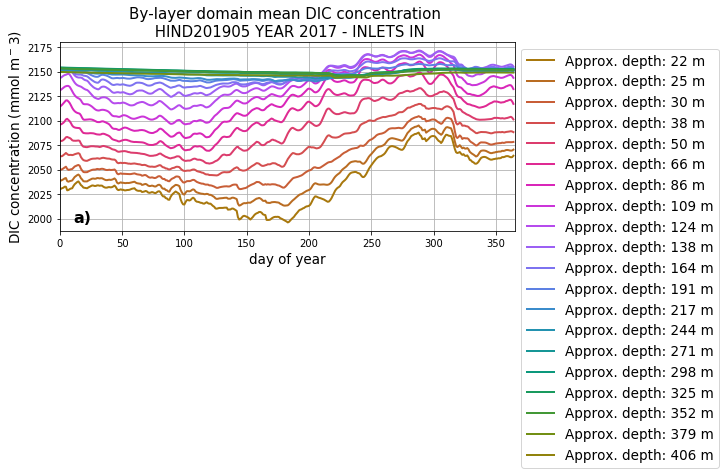

In [169]:
hind2017_DIC = pickle.load(open('./pkls/hind201905_2017_DIC_inletsIN.pkl' , 'rb')) 

ls = 20
le = 40
fig = plt.figure(figsize=(14*fact, 8.5*fact))

ax1 = plt.subplot2grid((2,3), (0,0), colspan=2, rowspan=1)
tcm = cm.phase
for i in range(ls,le):
    zdepth = np.sum(depth[0:i])
    if i%1 !=0: 
        ax1.plot(days_in,hind2017_DIC[i,:],color = tcm(1.*(i-ls)/(le-ls)), linewidth = lw)
    if i%1 == 0:
        ax1.plot(days_in,hind2017_DIC[i,:],color = tcm(1.*(i-ls)/(le-ls)),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(bbox_to_anchor=[1.0,1.0], fontsize = fs)
plt.xlim([0,365*1])
plt.grid()
ax1.set_xlabel('day of year', fontsize = fs)
ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration \n HIND201905 YEAR 2017 - INLETS IN', fontsize = ts)


Text(0.5, 1.0, 'By-layer domain mean DIC concentration \n HIND201905 YEAR 2015 - INLETS IN')

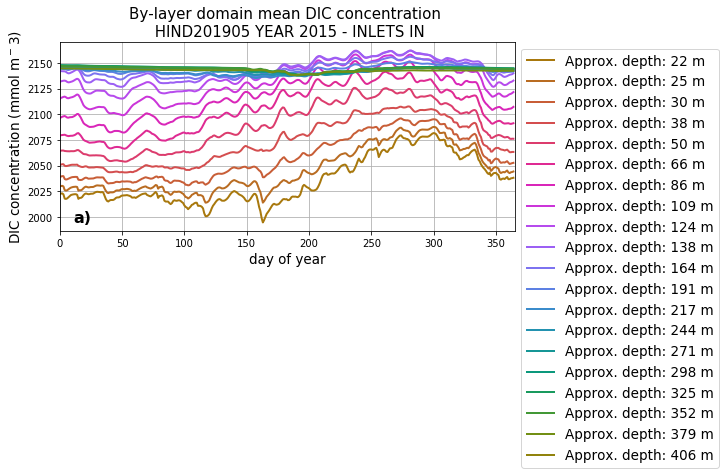

In [170]:
hind2015_DIC = pickle.load(open('./pkls/hind201905_2015_DIC_inletsIN.pkl' , 'rb')) 

ls = 20
le = 40
fig = plt.figure(figsize=(14*fact, 8.5*fact))

ax1 = plt.subplot2grid((2,3), (0,0), colspan=2, rowspan=1)
tcm = cm.phase
for i in range(ls,le):
    zdepth = np.sum(depth[0:i])
    if i%1 !=0: 
        ax1.plot(days_in,hind2015_DIC[i,:],color = tcm(1.*(i-ls)/(le-ls)), linewidth = lw)
    if i%1 == 0:
        ax1.plot(days_in,hind2015_DIC[i,:],color = tcm(1.*(i-ls)/(le-ls)),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(bbox_to_anchor=[1.0,1.0], fontsize = fs)
plt.xlim([0,365*1])
plt.grid()
ax1.set_xlabel('day of year', fontsize = fs)
ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration \n HIND201905 YEAR 2015 - INLETS IN', fontsize = ts)


Text(0.5, 1.0, 'By-layer domain mean DIC concentration \n  (hind201905 YEAR 2017 - BR3) - INLETS IN')

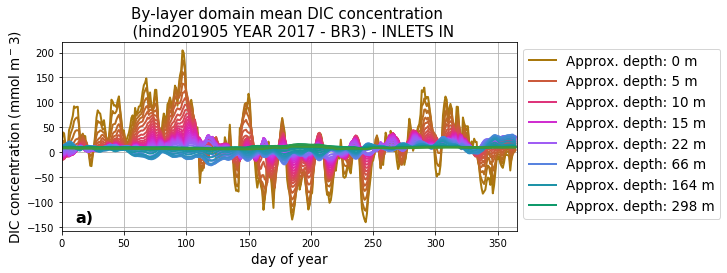

In [171]:
hind2017_DIC = pickle.load(open('./pkls/hind201905_2017_DIC_inletsIN.pkl' , 'rb')) 

ls = 0
le = 40
fig = plt.figure(figsize=(14*fact, 8.5*fact))

ax1 = plt.subplot2grid((2,3), (0,0), colspan=2, rowspan=1)
tcm = cm.phase
for i in range(ls,le):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax1.plot(days_in,hind2017_DIC[i,:]-BR3_var[i,:],color = tcm(1.*(i-ls)/(le-ls+5)), linewidth = lw)
    if i%5 == 0:
        ax1.plot(days_in,hind2017_DIC[i,:]-BR3_var[i,:],color = tcm(1.*(i-ls)/(le-ls+5)),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(bbox_to_anchor=[1.0,1.0], fontsize = fs)
plt.xlim([0,365*1])
plt.grid()
ax1.set_xlabel('day of year', fontsize = fs)
ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration \n  (hind201905 YEAR 2017 - BR3) - INLETS IN', fontsize = ts)


Text(0.5, 1.0, 'By-layer domain mean DIC concentration \n  (hind201905 YEAR 2015 - BR3) - INLETS IN')

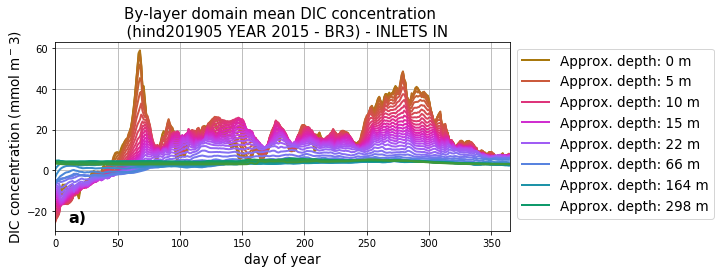

In [172]:
hind2015_DIC = pickle.load(open('./pkls/hind201905_2015_DIC_inletsIN.pkl' , 'rb')) 

ls = 0
le = 40
fig = plt.figure(figsize=(14*fact, 8.5*fact))

ax1 = plt.subplot2grid((2,3), (0,0), colspan=2, rowspan=1)
tcm = cm.phase
for i in range(ls,le):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax1.plot(days_in,hind2015_DIC[i,:]-BR3_var[i,:],color = tcm(1.*(i-ls)/(le-ls+5)), linewidth = lw)
    if i%5 == 0:
        ax1.plot(days_in,hind2015_DIC[i,:]-BR3_var[i,:],color = tcm(1.*(i-ls)/(le-ls+5)),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(bbox_to_anchor=[1.0,1.0], fontsize = fs)
plt.xlim([0,365*1])
plt.grid()
ax1.set_xlabel('day of year', fontsize = fs)
ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration \n  (hind201905 YEAR 2015 - BR3) - INLETS IN', fontsize = ts)


## code for finding fraser river discharge (pkled and commented out)

In [173]:
# import sys
# sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/VIZ')
# sys.path.append('/data/tjarniko/MEOPAR/tools/SalishSeaTools/salishsea_tools/')

# import river_201702 as rv
# ro_2015 = np.zeros([365,898,398])
# import arrow
# start = '2015-01-01'
# end = '2015-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array = []
# nc_ar = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)
    
# for i in range(0,len(arrow_array)):
#     tdate = arrow_array[i][0]
#     yy = tdate.format('YYYY')
#     mm = tdate.format('MM')
#     dd = tdate.format('DD')
#     tstr = f"/results/forcing/rivers/R201702DFraCElse_y{yy}m{mm}d{dd}.nc"
#     nc_ar.append(tstr)

# for i in range(0,365):
# #     if i%20 ==0:
# #         print(i)
#     t_nc = nc.Dataset(nc_ar[i])
#     ro = (np.squeeze(t_nc['rorunoff'][:,:,:]))
#     ro_2015[i,:,:] = ro


# watersheds = rv.prop_dict.keys()
# riv_i = []
# riv_j = []
# riv_shed = []
# riv_name = []
# i = 0
# for watshed in watersheds:
#     rivs = rv.prop_dict[watshed].keys()
#     for riv in rivs:
#         ti = rv.prop_dict[watshed][riv]['j']
#         tj = rv.prop_dict[watshed][riv]['i']
#         riv_i.append(ti)
#         riv_j.append(tj)
#         riv_shed.append(watshed)
#         riv_name.append(riv)
#         i = i+1
        
# tnc = nc.Dataset('/data/tjarniko/results/SAMPL/SalishSea_1ts_20141121_20141121_grid_T_20141121-20141121.nc')
# tnc2 = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

# #93 is 
# for r in range(93,94):
#     ti = riv_i[r]
#     tj = riv_j[r]
#     runoff = ro_2015[:,tj,ti]
#     t_area = (tnc.variables['area'][tj,ti])
#     year_runoff_use_area = (runoff / 1000) * t_area
#     e1t = tnc2.variables['e1t']
#     e2t = tnc2.variables['e2t']
    
#     year_runoff_use_et = (runoff/ 1000) * e1t[0,tj,ti] *e2t[0,tj,ti]
# plt.plot(year_runoff_use_area, label = 'discharge using area')
# plt.plot(year_runoff_use_et, linestyle = ':', label = 'discharge using e1t e2t')
# plt.legend()
# plt.title('Fraser river discharge, year 2015')

# pickle.dump(year_runoff_use_area, open("./pkls/Fraser_2015_year_runoff_m3_s.pkl", 'wb'))


#### IS the mobel mass balance stable?

In [190]:
BR3_bylayer_diff= np.zeros(40)
BR3_bylayer_diff_perc= np.zeros(40)
for i in range(0,40):
    BR3_bylayer_diff[i] = BR3_var[i,0]-BR3_var[i,364]
    BR3_bylayer_diff_perc[i] = (BR3_var[i,0]-BR3_var[i,364])/((BR3_var[i,0]+BR3_var[i,364])/2)*100


Text(0, 0.5, 'mean layer dic change mmol/m3')

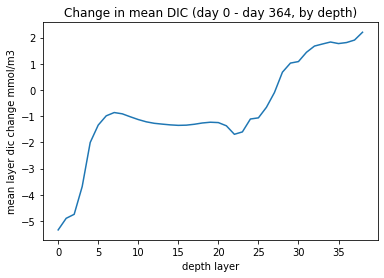

In [191]:
dp = np.arange(0,40,1)
plt.plot(dp,BR3_bylayer_diff)
plt.title('Change in mean DIC (day 0 - day 364, by depth)')
plt.xlabel('depth layer')
plt.ylabel('mean layer dic change mmol/m3')

Text(0, 0.5, 'mean layer dic change - %')

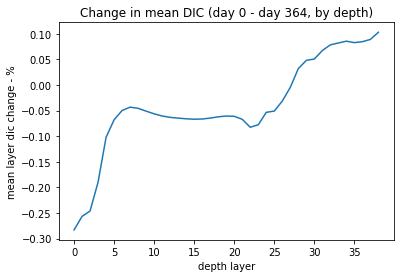

In [192]:
dp = np.arange(0,40,1)
plt.plot(dp,BR3_bylayer_diff_perc)
plt.title('Change in mean DIC (day 0 - day 364, by depth)')
plt.xlabel('depth layer')
plt.ylabel('mean layer dic change - %')